In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

kinome = pd.read_excel("/Users/xulongwang/Git/idTRAX/kinase_profile.xlsx", sheet_name = "Al-Ali 2015 S3")

In [2]:
kinome.describe()

,"Stratified_screen_category_(1=hit, 0=non-hit)",ABL1,ABL2,AKT1,AKT2,AKT3,ALK,AURKA,AURKB,AURKC,...,TEK,TNK2,TSSK1B,TSSK2,TTK,TXK,TYK2,TYRO3,YES1,ZAP70
count,256.00000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.00000,...,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000
mean,0.28125,8.148828,6.798047,1.367969,2.125000,2.050781,5.594922,4.445313,5.649609,3.85625,...,4.276953,1.795313,5.187891,2.689063,8.667188,3.999219,0.934766,2.828906,6.920703,1.431641
std,0.45049,14.920122,12.691057,6.835036,8.454125,8.114219,16.687215,9.634988,11.356505,9.69892,...,9.165137,6.666049,12.567239,8.700942,13.583506,7.581939,4.643503,3.660411,13.753616,2.356013
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,1.875000,1.775000,0.000000,0.000000,0.000000,0.400000,0.775000,1.100000,0.00000,...,1.200000,0.000000,1.000000,0.375000,2.500000,0.475000,0.000000,0.775000,0.900000,0.000000
50%,0.00000,3.750000,3.300000,0.400000,1.050000,1.000000,2.100000,2.450000,3.100000,1.20000,...,2.300000,0.700000,2.700000,1.200000,5.700000,2.500000,0.000000,2.200000,2.450000,0.850000
75%,1.00000,6.425000,5.400000,0.900000,1.800000,1.600000,3.525000,3.825000,5.000000,3.12500,...,4.000000,1.500000,4.225000,2.400000,9.725000,3.900000,0.300000,3.625000,4.750000,2.325000
max,1.00000,95.000000,92.000000,68.000000,80.000000,92.000000,98.000000,84.000000,84.000000,88.00000,...,79.000000,89.000000,95.000000,87.000000,94.000000,81.000000,60.000000,44.000000,89.000000,30.000000


In [111]:
X = kinome[kinome.columns[2:]]
print(X.shape)
y = kinome[kinome.columns[1]]
print(y.shape)

(256, 190)
(256,)


In [66]:
kinome.describe()

,"Stratified_screen_category_(1=hit, 0=non-hit)",ABL1,ABL2,AKT1,AKT2,AKT3,ALK,AURKA,AURKB,AURKC,...,TEK,TNK2,TSSK1B,TSSK2,TTK,TXK,TYK2,TYRO3,YES1,ZAP70
count,256.00000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.00000,...,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000
mean,0.28125,8.148828,6.798047,1.367969,2.125000,2.050781,5.594922,4.445312,5.649609,3.85625,...,4.276953,1.795312,5.187891,2.689062,8.667188,3.999219,0.934766,2.828906,6.920703,1.431641
std,0.45049,14.920122,12.691057,6.835036,8.454125,8.114219,16.687215,9.634988,11.356505,9.69892,...,9.165137,6.666049,12.567239,8.700942,13.583506,7.581939,4.643503,3.660411,13.753616,2.356013
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,1.875000,1.775000,0.000000,0.000000,0.000000,0.400000,0.775000,1.100000,0.00000,...,1.200000,0.000000,1.000000,0.375000,2.500000,0.475000,0.000000,0.775000,0.900000,0.000000
50%,0.00000,3.750000,3.300000,0.400000,1.050000,1.000000,2.100000,2.450000,3.100000,1.20000,...,2.300000,0.700000,2.700000,1.200000,5.700000,2.500000,0.000000,2.200000,2.450000,0.850000
75%,1.00000,6.425000,5.400000,0.900000,1.800000,1.600000,3.525000,3.825000,5.000000,3.12500,...,4.000000,1.500000,4.225000,2.400000,9.725000,3.900000,0.300000,3.625000,4.750000,2.325000
max,1.00000,95.000000,92.000000,68.000000,80.000000,92.000000,98.000000,84.000000,84.000000,88.00000,...,79.000000,89.000000,95.000000,87.000000,94.000000,81.000000,60.000000,44.000000,89.000000,30.000000


In [113]:
X = X.loc[:, X.std() > X.std().median()]
X.shape

(256, 47)

In [140]:
from sklearn import svm

mysvm = svm.SVC(kernel = "linear")
mysvm.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

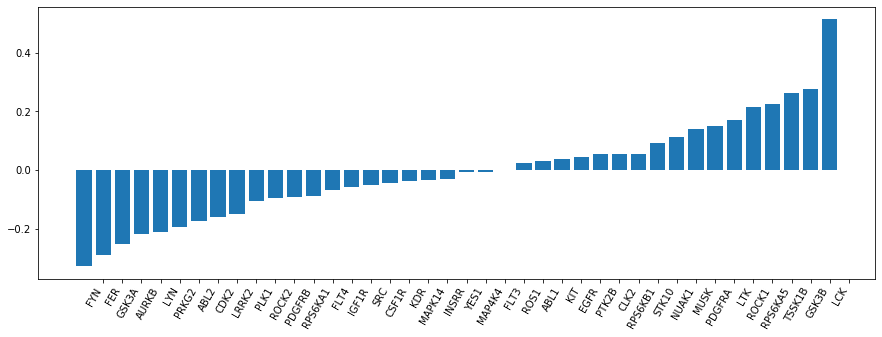

In [152]:
coef = mysvm.coef_.ravel()

top_positive = np.argsort(coef)[-20:]
top_negative = np.argsort(coef)[:20]
top_all = np.hstack([top_negative, top_positive])
names = X.columns[top_all]

plt.figure(figsize = (15, 5))
plt.bar(np.arange(40), coef[top_all])
plt.xticks(np.arange(1, 1 + 40), names, rotation = 60, ha = "right");

In [ ]:
from sklearn import linear_model

mylasso = linear_model.Lasso(alpha = 0.1)
mylasso.fit(X, y)